## **Scraping Data GOBIS**

In [ ]:
!pip install google-play-scraper

In [ ]:
!pip install pyyaml #untuk file konfigurasi atau pertukaran data

In [ ]:
#import library
from google_play_scraper import app, Sort, reviews
import pandas as pd
import numpy as np

In [ ]:
# Scrape all available reviews (8 Mei 2018 - 8 Juni 2023)

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.dishub.gobissurabaya',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=650,
)

In [ ]:
dataframe = pd.json_normalize(result) #data bentuk tabulasi
dataframe.head()

In [ ]:
dataframe_gobis = pd.DataFrame(np.array(result),columns=['review'])
dataframe_gobis = dataframe_gobis.join(pd.DataFrame(dataframe_gobis.pop('review').tolist()))
dataframe_gobis

In [ ]:
len(dataframe_gobis.index) #count the number of data we got

650

In [ ]:
dataframe_gobis[['content']].head()  #preview reviews only

,content
0,Ya Allah ya Allah ya Allah yyyyryyyyyyeyyyyyyy...
1,Kook ii
2,"Nyaman, pegawenya ramah"
3,Sangat membantu top surabaya
4,"aplikasi ga jelas, manfaatnya dimana?"


In [ ]:
my_dataframe = dataframe_gobis[['content']] #get reviews

In [ ]:
my_dataframe.head()

,content
0,Ya Allah ya Allah ya Allah yyyyryyyyyyeyyyyyyy...
1,Kook ii
2,"Nyaman, pegawenya ramah"
3,Sangat membantu top surabaya
4,"aplikasi ga jelas, manfaatnya dimana?"


In [ ]:
my_dataframe.to_csv("scraped_data_app_gobis.csv", index = False)  #Save the file as CSV

## **Pre-Processing Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load data gobis
import pandas as pd
ulasan = pd.read_csv('/content/drive/MyDrive/Proyek Akhir/scraped_data_app_gobis.csv')
ulasan

,content
0,"Nyaman, pegawenya ramah"
1,Sangat membantu top surabaya
2,"aplikasi ga jelas, manfaatnya dimana?"
3,Bisa melihat dri mna bis tayo suroboyo
4,"Tampilan aplikasinya mohon diperbaiki,,biar le..."
...,...
645,"Desain layout Tulisan dan icon kurang menarik,..."
646,Apik Ikhi.Ben Pendatang Ngerti Dalan Lan Angko...
647,👳 mantaaap
648,Semakin maju Dishub Surabaya


In [ ]:
#install Package
!pip install nlp-id

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 25.3 MB/s eta 0:00:00
  Created wheel for nlp-id: filename=nlp_id-0.1.15.0-py3-none-any.whl size=58153893 sha256=7f47a566c63a94f7a1b94f0f10698e8e11971fbb8a2b63bd63e077ff2f40dc62
  Stored in directory: /root/.cache/pip/wheels/85/34/2a/deaf7b7896a1eed336b874e1a7732588d40bb7bdc0a824e73e
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=b3e3178d6a34ace351a81d4a6f06f979d7e392d34ccabfe6ba9b8c559192795a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built nlp-id wget
  Attempting uninstall: pytest
    Found existing installation: pytest 7.2.2
    Uninstalling pytest-7.2.2:
      Successfully uninstalled pytest-7.2.2


In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.8 MB/s eta 0:00:00


In [ ]:
#import libraries
import numpy as np #untuk komputasi numerik
import string, unicodedata #membantu mempermudah manipulasi data text (pengolahan data text)
import re #mencari pola kata spesifik yang dicari/mendeteksi pola tertentu dalam string
import pandas as pd #membuat data frame
from tqdm import tqdm, notebook
import matplotlib.pyplot as plt
import csv
import sys
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

if not sys.warnoptions:
  import warnings
  warnings.simplefilter("ignore")


In [ ]:
from sqlalchemy.sql.expression import true
#preprocessing

def preprocess(text):
    # Hapus non-ascii
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Menghapus Tanda Baca
    text = re.sub(r'[^\w]|_',' ', text)

    # Menghapus Angka
    text = re.sub("\S*\d\S*", "", text).strip()
    text = re.sub(r"\b\d+\b", " ", text)

    # Mengubah text menjadi lowercase
    text = text.lower()

    # Menghapus white space
    text = re.sub('[\s]+', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text

    return text

In [ ]:
ulasan['preprocess'] = ulasan['content'].apply(preprocess)
ulasan

,content,preprocess
0,"Nyaman, pegawenya ramah",nyaman pegawenya ramah
1,Sangat membantu top surabaya,sangat membantu top surabaya
2,"aplikasi ga jelas, manfaatnya dimana?",aplikasi ga jelas manfaatnya dimana
3,Bisa melihat dri mna bis tayo suroboyo,bisa melihat dri mna bis tayo suroboyo
4,"Tampilan aplikasinya mohon diperbaiki,,biar le...",tampilan aplikasinya mohon diperbaiki biar leb...
...,...,...
645,"Desain layout Tulisan dan icon kurang menarik,...",desain layout tulisan dan icon kurang menarik ...
646,Apik Ikhi.Ben Pendatang Ngerti Dalan Lan Angko...,apik ikhi ben pendatang ngerti dalan lan angko...
647,👳 mantaaap,mantaaap
648,Semakin maju Dishub Surabaya,semakin maju dishub surabaya


In [ ]:
def split_word(teks):
    list_teks = []
    for txt in teks.split(" "):
        list_teks.append(txt)
    return list_teks

ulasan['split'] = ulasan['preprocess'].apply(split_word)

In [ ]:
#slangwords
normalized_word = pd.read_csv('kamusalay.csv')

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

ulasan['slangword'] = ulasan['split'].apply(normalized_term)
ulasan


,content,preprocess,split,slangword
0,"Nyaman, pegawenya ramah",nyaman pegawenya ramah,"[nyaman, pegawenya, ramah]","[nyaman, pegawai, ramah]"
1,Sangat membantu top surabaya,sangat membantu top surabaya,"[sangat, membantu, top, surabaya]","[sangat, membantu, top, surabaya]"
2,"aplikasi ga jelas, manfaatnya dimana?",aplikasi ga jelas manfaatnya dimana,"[aplikasi, ga, jelas, manfaatnya, dimana]","[aplikasi, tidak, jelas, manfaatnya, dimana]"
3,Bisa melihat dri mna bis tayo suroboyo,bisa melihat dri mna bis tayo suroboyo,"[bisa, melihat, dri, mna, bis, tayo, suroboyo]","[bisa, melihat, dari, mana, bis, tayo, surabaya]"
4,"Tampilan aplikasinya mohon diperbaiki,,biar le...",tampilan aplikasinya mohon diperbaiki biar leb...,"[tampilan, aplikasinya, mohon, diperbaiki, bia...","[tampilan, aplikasinya, mohon, diperbaiki, bia..."
...,...,...,...,...
645,"Desain layout Tulisan dan icon kurang menarik,...",desain layout tulisan dan icon kurang menarik ...,"[desain, layout, tulisan, dan, icon, kurang, m...","[desain, layout, tulisan, dan, ikon, kurang, m..."
646,Apik Ikhi.Ben Pendatang Ngerti Dalan Lan Angko...,apik ikhi ben pendatang ngerti dalan lan angko...,"[apik, ikhi, ben, pendatang, ngerti, dalan, la...","[bagus, ini, ya, pendatang, paham, dalan, nya,..."
647,👳 mantaaap,mantaaap,[mantaaap],[mantap]
648,Semakin maju Dishub Surabaya,semakin maju dishub surabaya,"[semakin, maju, dishub, surabaya]","[semakin, maju, dishub, surabaya]"


In [ ]:
#stopword
import nltk
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
stop.extend(['nya', 'sih', 'ya', 'ac', 'pkm', 'by', 'llpop', 'nasi', 'apollo', 'oom', 'ol', 'kokpkokpm', 'mm',
             'aja', 'in', 'tis', 'tiiiss', 'ww', 'ad', 'aj', 'aja', 'ajaa', 'ak', 'alhamdulillah', 'all',
             'alplikasi', 'ama', 'amiiiinnn', 'an', 'ank', 'ap', 'dal', 'deeeh', 'deehh', 'deh', 'dan',
             'diapps', 'dung', 'eeee', 'eh', 'nya', 'ku', 'ktnya', 'leta', 'lol', 'ma', 'mah', 'mang', 'ytc',
             'you', 'yono', 'yes', 'yani', 'yaaaa', 'yaa', 'ya', 'wkwkwwk', 'wkwk', 'wkt', 'wiyung',
             'wirawiri','win', 'l', 'p'])
#remove stopword
ulasan['slangword'] = ulasan['slangword'].apply(lambda x: ' '.join(x))
ulasan['stopword'] = ulasan['slangword'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
ulasan

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,preprocess,split,slangword,stopword
0,"Nyaman, pegawenya ramah",nyaman pegawenya ramah,"[nyaman, pegawenya, ramah]",nyaman pegawai ramah,nyaman pegawai ramah
1,Sangat membantu top surabaya,sangat membantu top surabaya,"[sangat, membantu, top, surabaya]",sangat membantu top surabaya,membantu top surabaya
2,"aplikasi ga jelas, manfaatnya dimana?",aplikasi ga jelas manfaatnya dimana,"[aplikasi, ga, jelas, manfaatnya, dimana]",aplikasi tidak jelas manfaatnya dimana,aplikasi manfaatnya dimana
3,Bisa melihat dri mna bis tayo suroboyo,bisa melihat dri mna bis tayo suroboyo,"[bisa, melihat, dri, mna, bis, tayo, suroboyo]",bisa melihat dari mana bis tayo surabaya,bis tayo surabaya
4,"Tampilan aplikasinya mohon diperbaiki,,biar le...",tampilan aplikasinya mohon diperbaiki biar leb...,"[tampilan, aplikasinya, mohon, diperbaiki, bia...",tampilan aplikasinya mohon diperbaiki biar leb...,tampilan aplikasinya mohon diperbaiki biar seg...
...,...,...,...,...,...
645,"Desain layout Tulisan dan icon kurang menarik,...",desain layout tulisan dan icon kurang menarik ...,"[desain, layout, tulisan, dan, icon, kurang, m...",desain layout tulisan dan ikon kurang menarik ...,desain layout tulisan ikon menarik mohon perba...
646,Apik Ikhi.Ben Pendatang Ngerti Dalan Lan Angko...,apik ikhi ben pendatang ngerti dalan lan angko...,"[apik, ikhi, ben, pendatang, ngerti, dalan, la...",bagus ini ya pendatang paham dalan nya angkut ...,bagus pendatang paham dalan angkut tumpang tuj...
647,👳 mantaaap,mantaaap,[mantaaap],mantap,mantap
648,Semakin maju Dishub Surabaya,semakin maju dishub surabaya,"[semakin, maju, dishub, surabaya]",semakin maju dishub surabaya,maju dishub surabaya


In [ ]:
#stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)


In [ ]:
ulasan['stemming'] = ulasan['stopword'].apply(stemming)
ulasan

,content,preprocess,split,slangword,stopword,stemming
0,"Nyaman, pegawenya ramah",nyaman pegawenya ramah,"[nyaman, pegawenya, ramah]",nyaman pegawai ramah,nyaman pegawai ramah,nyaman pegawai ramah
1,Sangat membantu top surabaya,sangat membantu top surabaya,"[sangat, membantu, top, surabaya]",sangat membantu top surabaya,membantu top surabaya,bantu top surabaya
2,"aplikasi ga jelas, manfaatnya dimana?",aplikasi ga jelas manfaatnya dimana,"[aplikasi, ga, jelas, manfaatnya, dimana]",aplikasi tidak jelas manfaatnya dimana,aplikasi manfaatnya dimana,aplikasi manfaat mana
3,Bisa melihat dri mna bis tayo suroboyo,bisa melihat dri mna bis tayo suroboyo,"[bisa, melihat, dri, mna, bis, tayo, suroboyo]",bisa melihat dari mana bis tayo surabaya,bis tayo surabaya,bis tayo surabaya
4,"Tampilan aplikasinya mohon diperbaiki,,biar le...",tampilan aplikasinya mohon diperbaiki biar leb...,"[tampilan, aplikasinya, mohon, diperbaiki, bia...",tampilan aplikasinya mohon diperbaiki biar leb...,tampilan aplikasinya mohon diperbaiki biar seg...,tampil aplikasi mohon baik biar segar mudah guna
...,...,...,...,...,...,...
645,"Desain layout Tulisan dan icon kurang menarik,...",desain layout tulisan dan icon kurang menarik ...,"[desain, layout, tulisan, dan, icon, kurang, m...",desain layout tulisan dan ikon kurang menarik ...,desain layout tulisan ikon menarik mohon perba...,desain layout tulis ikon tarik mohon baik desa...
646,Apik Ikhi.Ben Pendatang Ngerti Dalan Lan Angko...,apik ikhi ben pendatang ngerti dalan lan angko...,"[apik, ikhi, ben, pendatang, ngerti, dalan, la...",bagus ini ya pendatang paham dalan nya angkut ...,bagus pendatang paham dalan angkut tumpang tuj...,bagus datang paham dal angkut tumpang tuju duk...
647,👳 mantaaap,mantaaap,[mantaaap],mantap,mantap,mantap
648,Semakin maju Dishub Surabaya,semakin maju dishub surabaya,"[semakin, maju, dishub, surabaya]",semakin maju dishub surabaya,maju dishub surabaya,maju dishub surabaya


In [ ]:
#tokenizing
def split_word(teks):
    list_teks = []
    for txt in teks.split(" "):
        list_teks.append(txt)
    return list_teks

ulasan['tokenize'] = ulasan['stemming'].apply(split_word)
ulasan

,content,preprocess,split,slangword,stopword,stemming,tokenize
0,"Nyaman, pegawenya ramah",nyaman pegawenya ramah,"[nyaman, pegawenya, ramah]",nyaman pegawai ramah,nyaman pegawai ramah,nyaman pegawai ramah,"[nyaman, pegawai, ramah]"
1,Sangat membantu top surabaya,sangat membantu top surabaya,"[sangat, membantu, top, surabaya]",sangat membantu top surabaya,membantu top surabaya,bantu top surabaya,"[bantu, top, surabaya]"
2,"aplikasi ga jelas, manfaatnya dimana?",aplikasi ga jelas manfaatnya dimana,"[aplikasi, ga, jelas, manfaatnya, dimana]",aplikasi tidak jelas manfaatnya dimana,aplikasi manfaatnya dimana,aplikasi manfaat mana,"[aplikasi, manfaat, mana]"
3,Bisa melihat dri mna bis tayo suroboyo,bisa melihat dri mna bis tayo suroboyo,"[bisa, melihat, dri, mna, bis, tayo, suroboyo]",bisa melihat dari mana bis tayo surabaya,bis tayo surabaya,bis tayo surabaya,"[bis, tayo, surabaya]"
4,"Tampilan aplikasinya mohon diperbaiki,,biar le...",tampilan aplikasinya mohon diperbaiki biar leb...,"[tampilan, aplikasinya, mohon, diperbaiki, bia...",tampilan aplikasinya mohon diperbaiki biar leb...,tampilan aplikasinya mohon diperbaiki biar seg...,tampil aplikasi mohon baik biar segar mudah guna,"[tampil, aplikasi, mohon, baik, biar, segar, m..."
...,...,...,...,...,...,...,...
645,"Desain layout Tulisan dan icon kurang menarik,...",desain layout tulisan dan icon kurang menarik ...,"[desain, layout, tulisan, dan, icon, kurang, m...",desain layout tulisan dan ikon kurang menarik ...,desain layout tulisan ikon menarik mohon perba...,desain layout tulis ikon tarik mohon baik desa...,"[desain, layout, tulis, ikon, tarik, mohon, ba..."
646,Apik Ikhi.Ben Pendatang Ngerti Dalan Lan Angko...,apik ikhi ben pendatang ngerti dalan lan angko...,"[apik, ikhi, ben, pendatang, ngerti, dalan, la...",bagus ini ya pendatang paham dalan nya angkut ...,bagus pendatang paham dalan angkut tumpang tuj...,bagus datang paham dal angkut tumpang tuju duk...,"[bagus, datang, paham, dal, angkut, tumpang, t..."
647,👳 mantaaap,mantaaap,[mantaaap],mantap,mantap,mantap,[mantap]
648,Semakin maju Dishub Surabaya,semakin maju dishub surabaya,"[semakin, maju, dishub, surabaya]",semakin maju dishub surabaya,maju dishub surabaya,maju dishub surabaya,"[maju, dishub, surabaya]"


In [ ]:
#menghapus kata yang kurang dari 2
def filter_short_words(text):
    words = text.split()
    filtered_words = [word for word in words if len(word) >= 2]
    return ' '.join(filtered_words)

ulasan['teksbersih']= ulasan['stemming'].apply(filter_short_words)
ulasan['teksbersih']= ulasan['tokenize'].apply(lambda x: ' '.join(x))

# Export to csv file
ulasan.to_csv(r'text_clean.csv', index = False, header = True,index_label=None)
ulasan

,content,preprocess,split,slangword,stopword,stemming,tokenize,teksbersih
0,"Nyaman, pegawenya ramah",nyaman pegawenya ramah,"[nyaman, pegawenya, ramah]",nyaman pegawai ramah,nyaman pegawai ramah,nyaman pegawai ramah,"[nyaman, pegawai, ramah]",nyaman pegawai ramah
1,Sangat membantu top surabaya,sangat membantu top surabaya,"[sangat, membantu, top, surabaya]",sangat membantu top surabaya,membantu top surabaya,bantu top surabaya,"[bantu, top, surabaya]",bantu top surabaya
2,"aplikasi ga jelas, manfaatnya dimana?",aplikasi ga jelas manfaatnya dimana,"[aplikasi, ga, jelas, manfaatnya, dimana]",aplikasi tidak jelas manfaatnya dimana,aplikasi manfaatnya dimana,aplikasi manfaat mana,"[aplikasi, manfaat, mana]",aplikasi manfaat mana
3,Bisa melihat dri mna bis tayo suroboyo,bisa melihat dri mna bis tayo suroboyo,"[bisa, melihat, dri, mna, bis, tayo, suroboyo]",bisa melihat dari mana bis tayo surabaya,bis tayo surabaya,bis tayo surabaya,"[bis, tayo, surabaya]",bis tayo surabaya
4,"Tampilan aplikasinya mohon diperbaiki,,biar le...",tampilan aplikasinya mohon diperbaiki biar leb...,"[tampilan, aplikasinya, mohon, diperbaiki, bia...",tampilan aplikasinya mohon diperbaiki biar leb...,tampilan aplikasinya mohon diperbaiki biar seg...,tampil aplikasi mohon baik biar segar mudah guna,"[tampil, aplikasi, mohon, baik, biar, segar, m...",tampil aplikasi mohon baik biar segar mudah guna
...,...,...,...,...,...,...,...,...
645,"Desain layout Tulisan dan icon kurang menarik,...",desain layout tulisan dan icon kurang menarik ...,"[desain, layout, tulisan, dan, icon, kurang, m...",desain layout tulisan dan ikon kurang menarik ...,desain layout tulisan ikon menarik mohon perba...,desain layout tulis ikon tarik mohon baik desa...,"[desain, layout, tulis, ikon, tarik, mohon, ba...",desain layout tulis ikon tarik mohon baik desa...
646,Apik Ikhi.Ben Pendatang Ngerti Dalan Lan Angko...,apik ikhi ben pendatang ngerti dalan lan angko...,"[apik, ikhi, ben, pendatang, ngerti, dalan, la...",bagus ini ya pendatang paham dalan nya angkut ...,bagus pendatang paham dalan angkut tumpang tuj...,bagus datang paham dal angkut tumpang tuju duk...,"[bagus, datang, paham, dal, angkut, tumpang, t...",bagus datang paham dal angkut tumpang tuju duk...
647,👳 mantaaap,mantaaap,[mantaaap],mantap,mantap,mantap,[mantap],mantap
648,Semakin maju Dishub Surabaya,semakin maju dishub surabaya,"[semakin, maju, dishub, surabaya]",semakin maju dishub surabaya,maju dishub surabaya,maju dishub surabaya,"[maju, dishub, surabaya]",maju dishub surabaya


In [ ]:
# Determine sentiment label of ulasan using indonesia sentiment lexicon

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('/content/drive/MyDrive/Proyek Akhir/lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('/content/drive/MyDrive/Proyek Akhir/lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of ulasan
def sentiment_analysis_lexicon_indonesia(text):
    words = text.split()
    #for word in text:
    score = 0
    for word in words:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positif'
    elif (score < 0):
        polarity = 'negatif'
    else:
        polarity = 'netral'
    return score, polarity

In [ ]:
hasil = ulasan['teksbersih'].apply(sentiment_analysis_lexicon_indonesia)
hasil = list(zip(*hasil))
ulasan['polarity_score'] = hasil[0]
ulasan['polarity'] = hasil[1]
print(ulasan['polarity'].value_counts())
ulasan

# Export to csv file
ulasan.to_csv(r'labelkelas.csv', index = False, header = True,index_label=None)
ulasan

positif    324
negatif    263
netral      63
Name: polarity, dtype: int64


,content,preprocess,split,slangword,stopword,stemming,tokenize,teksbersih,polarity_score,polarity
0,"Nyaman, pegawenya ramah",nyaman pegawenya ramah,"[nyaman, pegawenya, ramah]",nyaman pegawai ramah,nyaman pegawai ramah,nyaman pegawai ramah,"[nyaman, pegawai, ramah]",nyaman pegawai ramah,9,positif
1,Sangat membantu top surabaya,sangat membantu top surabaya,"[sangat, membantu, top, surabaya]",sangat membantu top surabaya,membantu top surabaya,bantu top surabaya,"[bantu, top, surabaya]",bantu top surabaya,6,positif
2,"aplikasi ga jelas, manfaatnya dimana?",aplikasi ga jelas manfaatnya dimana,"[aplikasi, ga, jelas, manfaatnya, dimana]",aplikasi tidak jelas manfaatnya dimana,aplikasi manfaatnya dimana,aplikasi manfaat mana,"[aplikasi, manfaat, mana]",aplikasi manfaat mana,1,positif
3,Bisa melihat dri mna bis tayo suroboyo,bisa melihat dri mna bis tayo suroboyo,"[bisa, melihat, dri, mna, bis, tayo, suroboyo]",bisa melihat dari mana bis tayo surabaya,bis tayo surabaya,bis tayo surabaya,"[bis, tayo, surabaya]",bis tayo surabaya,0,netral
4,"Tampilan aplikasinya mohon diperbaiki,,biar le...",tampilan aplikasinya mohon diperbaiki biar leb...,"[tampilan, aplikasinya, mohon, diperbaiki, bia...",tampilan aplikasinya mohon diperbaiki biar leb...,tampilan aplikasinya mohon diperbaiki biar seg...,tampil aplikasi mohon baik biar segar mudah guna,"[tampil, aplikasi, mohon, baik, biar, segar, m...",tampil aplikasi mohon baik biar segar mudah guna,4,positif
...,...,...,...,...,...,...,...,...,...,...
645,"Desain layout Tulisan dan icon kurang menarik,...",desain layout tulisan dan icon kurang menarik ...,"[desain, layout, tulisan, dan, icon, kurang, m...",desain layout tulisan dan ikon kurang menarik ...,desain layout tulisan ikon menarik mohon perba...,desain layout tulis ikon tarik mohon baik desa...,"[desain, layout, tulis, ikon, tarik, mohon, ba...",desain layout tulis ikon tarik mohon baik desa...,12,positif
646,Apik Ikhi.Ben Pendatang Ngerti Dalan Lan Angko...,apik ikhi ben pendatang ngerti dalan lan angko...,"[apik, ikhi, ben, pendatang, ngerti, dalan, la...",bagus ini ya pendatang paham dalan nya angkut ...,bagus pendatang paham dalan angkut tumpang tuj...,bagus datang paham dal angkut tumpang tuju duk...,"[bagus, datang, paham, dal, angkut, tumpang, t...",bagus datang paham dal angkut tumpang tuju duk...,-3,negatif
647,👳 mantaaap,mantaaap,[mantaaap],mantap,mantap,mantap,[mantap],mantap,5,positif
648,Semakin maju Dishub Surabaya,semakin maju dishub surabaya,"[semakin, maju, dishub, surabaya]",semakin maju dishub surabaya,maju dishub surabaya,maju dishub surabaya,"[maju, dishub, surabaya]",maju dishub surabaya,5,positif


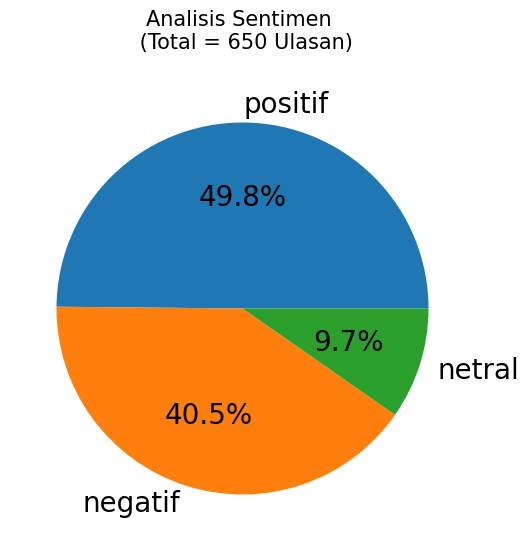

In [ ]:
#visualisasi pie chart
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6, 8))
size = [count for count in ulasan['polarity'].value_counts()]
label = list(ulasan['polarity'].value_counts().index)
ax.pie(x = size, labels = label, autopct='%1.1f%%', textprops = {'fontsize': 20})
ax.set_title('Analisis Sentimen \n (Total = 650 Ulasan)', fontsize = 15, pad = 20)
plt.show()

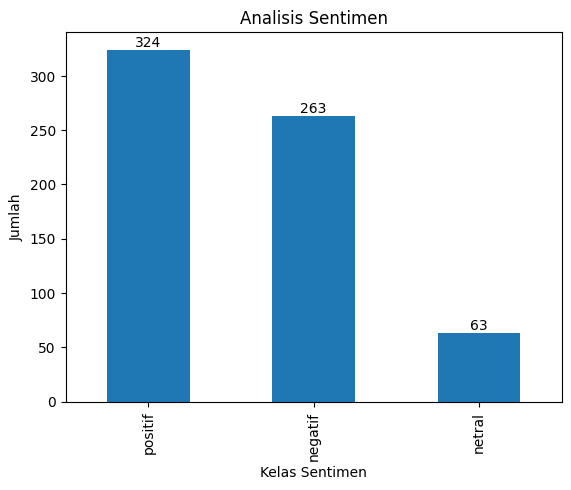

In [ ]:
#visualisasi bar chart
import matplotlib.pyplot as plt
plt.title('Analisis Sentimen')
plt.xlabel('Kelas Sentimen')
plt.ylabel('Jumlah')
ulasan['polarity'].value_counts().plot(kind = 'bar')
for i, v in enumerate(ulasan['polarity'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

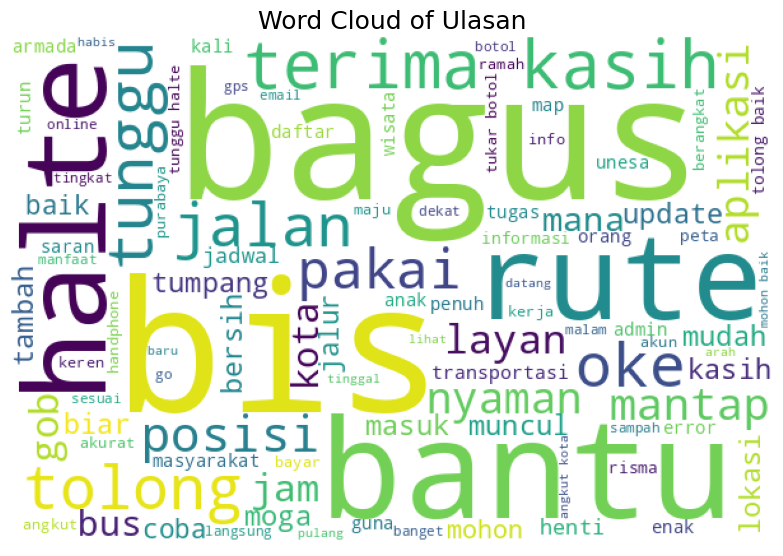

In [ ]:
# Visualize word cloud
from wordcloud import WordCloud

list_words=''
for text in ulasan['teksbersih']:
    list_words += ' '+ text

wordcloud = WordCloud(width = 600, height = 400, background_color = 'white', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Ulasan', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

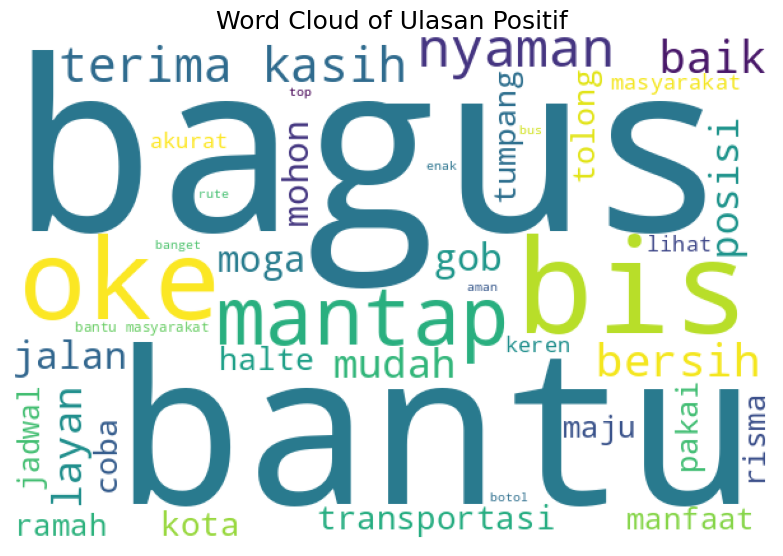

In [ ]:
# Visualize word cloud
from wordcloud import WordCloud
pos = ulasan[ulasan['polarity']=='positif']

list_words=''
for text in pos['teksbersih']:
    list_words += ' '+ text

wordcloud = WordCloud(width = 600, height = 400, background_color = 'white', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Ulasan Positif', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

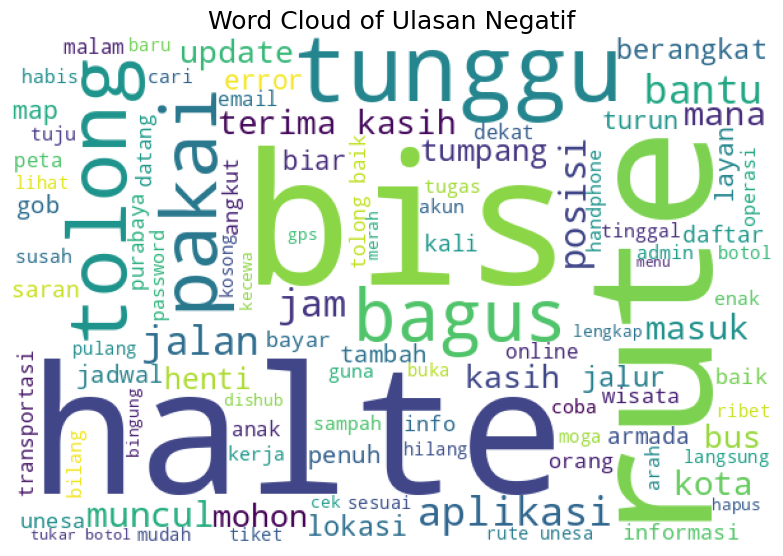

In [ ]:
# Visualize word cloud
from wordcloud import WordCloud
neg = ulasan[ulasan['polarity']=='negatif']

list_words=''
for text in neg['teksbersih']:
    list_words += ' '+ text

wordcloud = WordCloud(width = 600, height = 400, background_color = 'white', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Ulasan Negatif', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

## **TF-IDF**

In [ ]:
!pip install scikit-learn

In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('labelkelas_posneg.csv', usecols=['polarity', 'tokenize'])
data.columns = ['label', 'ulasan']

data

,label,ulasan
0,positif,"['nyaman', 'pegawai', 'ramah']"
1,positif,"['bantu', 'top', 'surabaya']"
2,positif,"['aplikasi', 'manfaat', 'mana']"
3,positif,"['tampil', 'aplikasi', 'mohon', 'baik', 'biar'..."
4,negatif,"['aplikasi', 'angkut', 'baik', 'bantu', 'penuh..."
...,...,...
582,positif,"['desain', 'layout', 'tulis', 'ikon', 'tarik',..."
583,negatif,"['bagus', 'datang', 'paham', 'dal', 'angkut', ..."
584,positif,['mantap']
585,positif,"['maju', 'dishub', 'surabaya']"


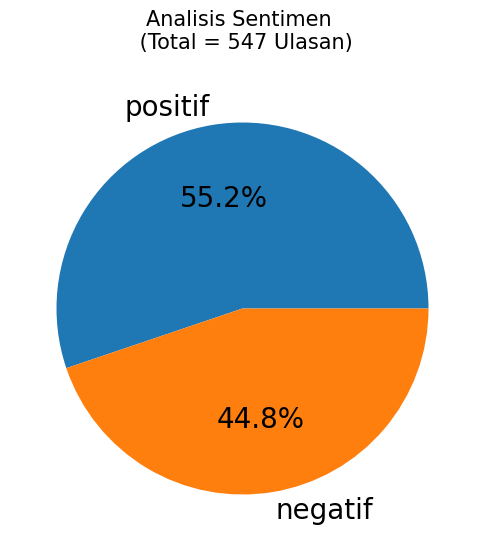

In [ ]:
#visualisasi pie chart
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6, 8))
size = [count for count in data['label'].value_counts()]
label = list(data['label'].value_counts().index)
ax.pie(x = size, labels = label, autopct='%1.1f%%', textprops = {'fontsize': 20})
ax.set_title('Analisis Sentimen \n (Total = 547 Ulasan)', fontsize = 15, pad = 20)
plt.show()

In [ ]:
# join list of token as single document string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

data["ulasan_join"] = data["ulasan"].apply(join_text_list)

data["ulasan_join"].head()

0                                 nyaman pegawai ramah
1                                   bantu top surabaya
2                                aplikasi manfaat mana
3     tampil aplikasi mohon baik biar segar mudah guna
4    aplikasi angkut baik bantu penuh butuh warga s...
Name: ulasan_join, dtype: object

In [ ]:
data_tf = data['ulasan_join'].tolist()
# Menghitung frekuensi term (TF)
term_frequency = []
for doc in data_tf:
    words = doc.lower().split()
    tf = {}
    for word in words:
        tf[word] = tf.get(word, 0) + 1
    term_frequency.append(tf)

tf = pd.DataFrame(term_frequency)
tf = tf.fillna(0)
tf

,nyaman,pegawai,ramah,bantu,top,surabaya,aplikasi,manfaat,mana,tampil,...,pos,belah,gin,cocok,desain,layout,kelas,mewah,dal,android
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0
583,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
585,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


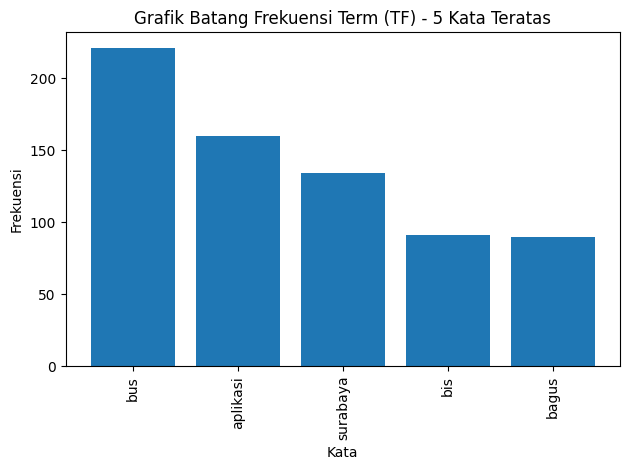

In [ ]:
top_words = tf.sum().nlargest(5).index
total_frequency = tf[top_words].sum()

plt.bar(top_words, total_frequency)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Grafik Batang Frekuensi Term (TF) - 5 Kata Teratas')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# banyaknya term yang akan digunakan,
# di pilih berdasarkan top max_features
# yang diurutkan berdasarkan term frequency seluruh corpus
max_features = 2000

# Feature Engineering
print ("------- TF-IDF on ulasan data -------")

tf_idf = TfidfVectorizer(max_features=max_features, binary=True)
tfidf_mat = tf_idf.fit_transform(data["ulasan_join"]).toarray()

print("TF-IDF ", type(tfidf_mat), tfidf_mat.shape)


------- TF-IDF on ulasan data -------
TF-IDF  <class 'numpy.ndarray'> (587, 1034)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 2000

# calc TF vector
cvect = CountVectorizer(max_features=max_features)
TF_vector = cvect.fit_transform(data["ulasan_join"])

# normalize TF vector
normalized_TF_vector = normalize(TF_vector, norm='l1', axis=1)

# calc IDF
tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
tfs = tfidf.fit_transform(data["ulasan_join"])
IDF_vector = tfidf.idf_

# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
tfidf_mat = normalized_TF_vector.multiply(IDF_vector).toarray()
tfidf_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
vocab = tfidf.vocabulary_

In [ ]:
print(sorted(vocab.items()))

[('ada', 0), ('adakan', 1), ('admin', 2), ('agen', 3), ('ajak', 4), ('ajar', 5), ('akomodasi', 6), ('akses', 7), ('aktif', 8), ('aktivitas', 9), ('akun', 10), ('akurasi', 11), ('akurat', 12), ('alam', 13), ('alamat', 14), ('alas', 15), ('alat', 16), ('alias', 17), ('alih', 18), ('alternatif', 19), ('aman', 20), ('ambil', 21), ('amin', 22), ('ampel', 23), ('ampun', 24), ('anak', 25), ('android', 26), ('aneh', 27), ('angkat', 28), ('angkut', 29), ('angus', 30), ('antarmuka', 31), ('antri', 32), ('anyar', 33), ('aplikasi', 34), ('arah', 35), ('area', 36), ('arjuno', 37), ('armada', 38), ('asa', 39), ('asai', 40), ('asli', 41), ('aslisurabaya', 42), ('asri', 43), ('asyik', 44), ('atum', 45), ('atur', 46), ('auto', 47), ('awal', 48), ('awas', 49), ('ayo', 50), ('baca', 51), ('bagus', 52), ('bahan', 53), ('baik', 54), ('bakar', 55), ('bandara', 56), ('banding', 57), ('bang', 58), ('banget', 59), ('bangetsemoga', 60), ('banking', 61), ('bantu', 62), ('banyak', 63), ('banyaksangat', 64), ('bar

In [ ]:
print(tfidf.get_feature_names_out())
a = tfidf.get_feature_names_out()

['ada' 'adakan' 'admin' ... 'wiri' 'wisata' 'wisatawan']


In [ ]:
print(tfs.toarray())
b = tfs.toarray()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
tfidf_mat = normalized_TF_vector.multiply(IDF_vector).toarray()
dftfidf = pd.DataFrame(data=tfidf_mat, columns=[a])
dftfidf

,ada,adakan,admin,agen,ajak,ajar,akomodasi,akses,aktif,aktivitas,...,waru,wetan,wib,widya,wifi,wilayah,wira,wiri,wisata,wisatawan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dftfidf.to_csv('hasil_vector_space_matrix.csv')

## **Klasifikasi**

In [ ]:
X= np.array(dftfidf)
Y= data['label']

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
Y.shape

(587,)

In [ ]:
X.shape

(587, 1034)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clasfc= MultinomialNB()
#fit the model
model = clasfc.fit(X, Y)

In [ ]:
#k-fold CV
#import cvs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#10-fold CV
kfold = KFold(n_splits = 10)
scores = cross_val_score(model, X, Y, cv = kfold)
scores

array([0.81355932, 0.81355932, 0.88135593, 0.88135593, 0.86440678,
       0.86440678, 0.74576271, 0.89655172, 0.89655172, 0.79310345])

In [ ]:
scores.mean()

0.8450613676212739

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
#prediksi
y_pred = cross_val_predict(model, X, Y, cv = kfold)
conf_mat = confusion_matrix(Y, y_pred)

print(conf_mat)

[[234  29]
 [ 62 262]]


In [ ]:
print("Multinomial NB Accuracy:" , accuracy_score(Y,y_pred))
print(f'confusion matrix:\n {confusion_matrix(Y, y_pred)}')
print('-----------------------------------------------\n')
print(classification_report(Y,y_pred, zero_division=0))

Multinomial NB Accuracy: 0.8449744463373083
confusion matrix:
 [[234  29]
 [ 62 262]]
-----------------------------------------------

              precision    recall  f1-score   support

     negatif       0.79      0.89      0.84       263
     positif       0.90      0.81      0.85       324

    accuracy                           0.84       587
   macro avg       0.85      0.85      0.84       587
weighted avg       0.85      0.84      0.85       587



In [ ]:
input_baru = ['aplikasi bantu']
model.predict(tf_idf.transform(input_baru))

array(['positif'], dtype='<U7')

In [ ]:
tfidf.fit_transform(input_baru)

<1x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

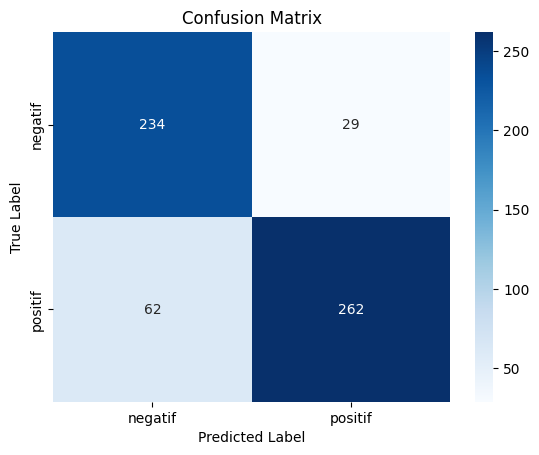

In [ ]:
conf_mat = confusion_matrix(Y, y_pred)
class_label = ["negatif",'positif']
train = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(train, annot = True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
TP = 262
TN = 234
FP = 29
FN = 62

In [ ]:
spesifisitas = TN/(TN+FP)
spesifisitas

0.8897338403041825

In [ ]:
sensitivitas= TP/(TP+FN)
sensitivitas

0.808641975308642

In [ ]:
from math import sqrt
#G-mean
gmean = sqrt(sensitivitas*spesifisitas)
gmean

0.8482193879666499

In [ ]:
#auc
auc = 1/2*(sensitivitas+spesifisitas)
auc

0.8491879078064122